# Introduction to Computer Vision - Jacob Bigham
## 1. Basic Image Manipulation
Before venturing into the rich and complex world of computer vision, it's important to get a strong hold on a few basics. In particular, because we will use OpenCV, we'll first get ourselves acquainted with some of the most basic functionalities in the package.

This notebook explores the following:
1. Basic image processing with OpenCV
2. Images as 3-D functions and basic edge detection

### 1.1 Basic Image Processing with OpenCV
We'll import OpenCV and NumPy. You are welcome to leave cv2 as it is, without aliasing to cv; many people do leave it.

In [2]:
import cv2 as cv
import numpy as np

#additional package for displaying images
from matplotlib import pyplot as plt

>To **open an image** with OpenCV, use the `imread` function:

In [3]:
steve = cv.imread('img/steve_jobs.jpg')

It's extremely important that we understand exactly how images are stored in memory.
* What's the data structure?
* How do we represent it pictorially?
An image is simply an matrix of light intensities. Let's take a look at the structure of our image:

In [4]:
steve.shape

(800, 1200, 3)

The photo we've read from memory is a 3-dimensional matrix of light intensities, where each value in the matrix represents the intensity for a given pixel. Typically, each image has R, G, and B layers, corresponding to the red, green, and blue intensities for each pixel. Each individual pixel in your monitor emits red, green, and blue light. The colors combine to form the full spectrum. You can think of each image, more or less, as three images in one: a red image, stacked atop a green image, stacked atop a blue image.

Our image is 800 x 1200 pixels, with an R, G, and B channel for each. Let's examine this more closely.

Let's first view our image. There are a quite a few ways to display images with Python. Using OpenCV to display the images in Jupyter Notebooks causes the images to open in a new window and requires a bit of clunky code that I think is confusing.

When you run the next cell, our image will open in a new window:

In [5]:
cv.imshow('Steve Jobs', steve)
cv.waitKey(0)
cv.destroyAllWindows()

We can also display images using matplotlib.

By default, OpenCV uses BGR as its color order, whereas matplotlib uses RGB. So, we have to reverse the order of the channel layers when using matplotlib to display images. Notably, this doesn't affect what we see on the screen, but we have to know which convention we are working with.
>To convert between color schemes with OpenCV, use the `cvtColor` function:

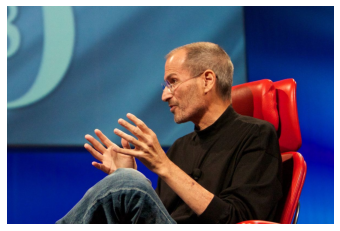

In [34]:
rgb = cv.cvtColor(steve, cv.COLOR_BGR2RGB)
%matplotlib inline
plt.imshow(rgb)
plt.axis('off')
plt.show()

There's no reason for us to write five lines of code every time we want to display an image. Let's make this easier on ourselves:

In [35]:
def show(image):
    """
    Displays a BGR or grayscale/single-channel image inline.
    """
    %matplotlib inline
    rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()

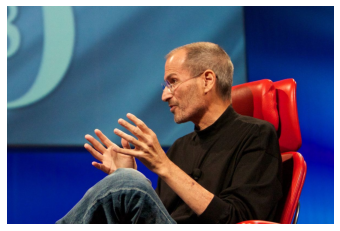

In [8]:
show(steve)

We can view each channel individually:

In [9]:
def split(image):
    """
    Returns the red, green, and blue channels of a color image as a 3-tuple.
    Each split channel is 3-dimensional.
    """
    b, g, r = cv.split(image)
    k = np.zeros_like(b)
    blue = cv.merge([b, k, k])
    green = cv.merge([k, g, k])
    red = cv.merge([k, k, r])
    return red, green, blue

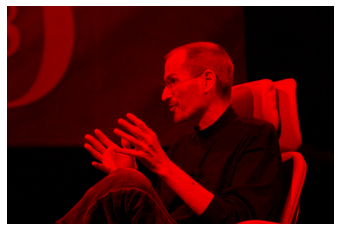

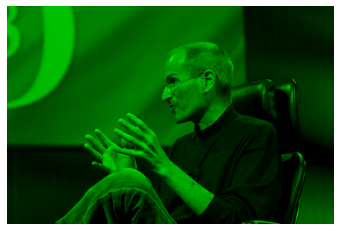

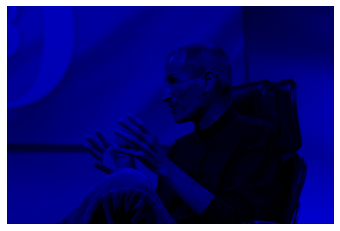

In [10]:
red, green, blue = split(steve)
show(red)
show(green)
show(blue)

Take a good look at how much each individual color contributes to the overall image.
* Black areas have very little color intensity from any of the R, G, and B channels.
* White/light areas have high intensity from all three channels.
* Blue, red, or green channels have high intensity only from their corresponding individual channel.

We've now seen how to open an image and how to display an image and its corresponding color channels. You also should be able to save an image.

>To **save an image** with OpenCV, use the `imwrite` function:

In [11]:
cv.imwrite('img/blue.jpg', blue)

True

Notice that the output of the `imwrite` function tells you whether the image was successfully saved.

**Summary**
1. Use the imread and imwrite functions to read and write images with OpenCV.
2. By default, OpenCV uses the BGR color scheme, as opposed to matplotlib's RGB.
3. Images are 3-dimensional arrays of color intensities, with each layer corresponding to the B, G, or R channel.

**Exercises**
1. Write a function, `scale`, that processes an image by scaling each color layer. For example, scale(image, 0.5, 0.3, 0.7) should return an image whose blue channel is half as bright as the original image's blue channel, whose green is 0.3 times as bright, and whose red is 0.7 times as bright. The obvious solution does not work; try it first, and then figure out how to work with the built-in data types. *How we store our images affects the way we process them!*
2. Use that function write another function, `grayscale` to convert an image to grayscale. Use the standard weights of 0.0722, 0.7152, and 0.2126 (for B, G, and R). The solution is **not** to simply call the `scale` function with the given weights.
3. Alternatively, convert to grayscale using the optional cv.IMREAD_GRAYSCALE argument when reading the image.
4. Alternatively, convert to grayscale using the `cvtColor` function.
5. Modify our `show` function to create a `show_grayscale` function. You will need to use the cmap argument for pyplot's `imshow` function.

***Exercise 1:***  We run into a bit of an issue, which is that our jpg images are stored as matrices of type uint8. Notice, of course, that this makes sense, since the color intensities range from 0-255, meaning we need 8 bits to store each value. It's not required that we store the values this way, though it is the default for jpg. Surely there are many ways to go about this, but a simple way to do it is to simply convert types. Notice that we use unsigned ints, since our pixel values should not be negative.

In [12]:
def scale(image, b_scale, g_scale, r_scale):
    """
    Scales an image by the given scaling factors and returns the scaled image.
    The image must be a 3-dimensional vector in BGR format.
    """
    if b_scale < 0 or g_scale < 0 or r_scale < 0:
        raise ValueError('Scale factors cannot be negative.')
    if b_scale > 1 or g_scale > 1 or r_scale > 1:
        raise ValueError('Scale factors cannot exceed 1.0.')
    image_float = image
    b, g, r = cv.split(image_float)
    b = (b.astype(float) * b_scale).astype(np.uint8)
    g = (g.astype(float) * g_scale).astype(np.uint8)
    r = (r.astype(float) * r_scale).astype(np.uint8)
    scaled_image = cv.merge([b, g, r])
    return scaled_image

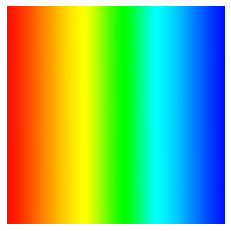

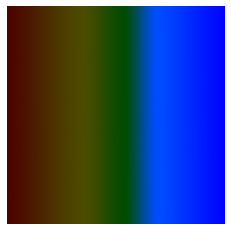

In [13]:
rainbow = cv.imread('img/rainbow.jpg')
show(rainbow)
mostly_blue = scale(rainbow, 1, 0.3, 0.3)
show(mostly_blue)

Why can't the scale factors exceed 1.0? Well, they can, but weird stuff starts to happen:

In [16]:
integers = np.array([0, 100, 255], dtype=np.uint8)
print(integers)
integers_2 = integers * 25
print(integers_2)

[  0 100 255]
[  0 196 231]


***Unsigned integers do not play nicely.***

They do, however, behave predictably:

In [18]:
a = (25 * 100) % 256
b = (25 * 255) % 256
integers_3 = np.array([0, a, b])
print(integers)
print(integers_2)
print(integers_3)

[  0 100 255]
[  0 196 231]
[  0 196 231]


Overflow from addition and multiplication to unsigned ints "wraps around" once it hits 255.

***Exercise 2:*** We cannot simply use the scale function from exercise 1 with the given weights. What happens if we do that?

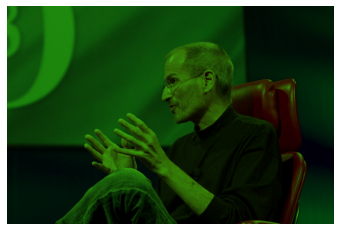

In [19]:
wrong_gray_steve = scale(steve, 0.0722, 0.7152, 0.2126)
show(wrong_gray_steve)

Instead, we make the B, G, and R channels the same for each pixel, and the value we set them to is the sum of the scaled values.

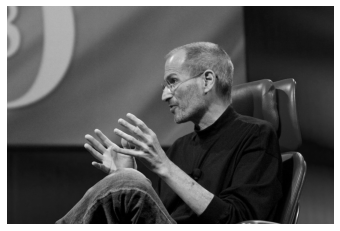

In [20]:
def grayscale(image):
    """
    Returns a 3-channel grayscaled image.
    """
    scaled = scale(image, 0.0722, 0.7152, 0.2126)
    avg = np.sum(scaled, axis = 2).astype(np.uint8)
    grayscale_image = cv.merge([avg, avg, avg])
    return grayscale_image

gray_steve = grayscale(steve)
show(gray_steve)

I defined this function to return three channels, each of which is the same. ***In general***, grayscale images are flattened, and the functions in exercises 3 and 4 flatten the images to 2-dimensional arrays.

***Exercise 3:*** As is the case with many common functionalities, OpenCV has built-in ways to do them for us. It's extremely important, however, that you have a basic idea of the types of manipulations taking place under the hood. As things get more complicated, you absolutely will get lost if you don't have a good working understanding of image operations.

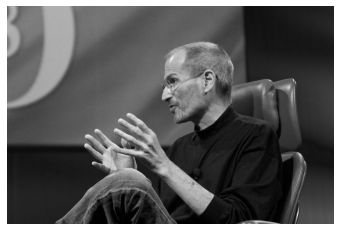

In [21]:
gray_steve_2 = cv.imread('img/steve_jobs.jpg', cv.IMREAD_GRAYSCALE)
show(gray_steve_2)

***Exercise 4:*** You cannot get back the original color image once you have converted to grayscale, so sometimes conversion will save a re-read.

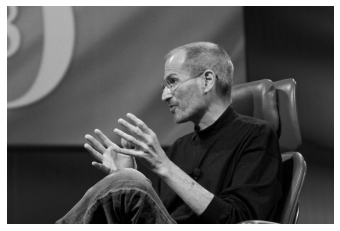

In [22]:
gray_steve_3 = cv.cvtColor(steve, cv.COLOR_BGR2GRAY)
show(gray_steve_3)

***Exercise 5:*** We can use OpenCV's `cvtColor` and then tell pyplot to display as a grayscale image by setting the cmap argument to 'gray'.

In [23]:
def show_grayscale(image):
    """
    Shows a color or grayscale image in grayscale.
    """
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')
    plt.show()

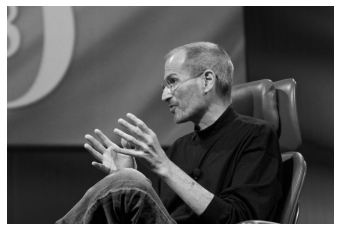

In [24]:
show_grayscale(steve)

### 1.2 Images as 3-D Functions
Even though we've just explored how images are stored as 3-dimensional data structures, it's tempting to think of them as flat, since they are ultimately rendered on a 2-dimensional screen. Much of the mathematical analysis we will do of images requires that we understand them as **functions** as well as data structures. (Later, it will be even more important to add a third level of understanding: that images are projections of 3-dimensional space.)

We've seen that images are matrices of color intensities at each pixel. Let's look at the top left corner of our grayscale Steve jobs photo:

In [25]:
print(gray_steve[:15, :15, 0])

[[112 117 125 130 135 141 146 151 159 160 163 166 168 171 173]
 [110 115 122 129 132 138 146 149 152 156 159 166 168 170 170]
 [108 112 119 125 130 135 142 148 150 153 159 166 168 170 169]
 [106 110 115 122 125 131 137 144 150 153 158 164 168 170 170]
 [106 109 114 117 122 128 134 138 149 152 155 159 164 168 170]
 [104 108 112 115 119 125 131 137 147 148 152 155 160 164 168]
 [100 105 110 114 117 125 132 138 143 146 151 156 160 165 167]
 [ 97 101 108 113 117 125 135 142 141 146 152 160 164 166 167]
 [102 104 108 113 117 124 131 135 143 146 151 156 162 165 166]
 [ 95  97 102 109 115 124 131 137 138 143 147 152 157 160 162]
 [ 98 100 104 108 113 117 126 131 137 141 147 152 156 159 161]
 [103 104 106 109 112 117 122 127 142 145 149 154 160 162 164]
 [ 95  98 102 106 111 117 126 131 138 143 148 153 158 162 164]
 [ 97  98  99 104 108 115 122 128 133 137 143 148 154 158 160]
 [101 101 103 104 107 113 120 126 130 134 140 148 153 158 162]]


By the way, this *is* the **top left** corner. Our axis system for images has the origin as the top left of an image, with the y-value increasing as we go *down* an image. Remember that our coordinate system has the y-value *first*, following by the x-vale. This is the opposite of what we are used to with cartesian coordinates.

You can see the values to the far left are darker (less intense light) than the ones moving to the right, where the color in the photo gets lighter. This is a 3-dimensional function, where light intensity is a function of x and y position in the image.

We can plot this function in 3 dimensions to get a sense for what the image looks like as a function:

In [26]:
def image_as_function(image, alpha=70, beta=75):
    """
    Plots an image as a three-dimensional grayscale function.
    Supports flat and 3-channel grayscale images, but does not convert to grayscale from color.
    Alpha and beta parameters control default rotation of the generated figure.
    """
    %matplotlib notebook
    if len(image.shape) == 3:
        height, width, _ = image.shape
        Z = image[:, :, 0]
    else:
        height, width = image.shape
        Z = image
    x = np.arange(width-1, -1, -1)
    y = np.arange(0, height, 1)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='gray')
    ax.view_init(alpha, beta)
    plt.show()

<IPython.core.display.Javascript object>


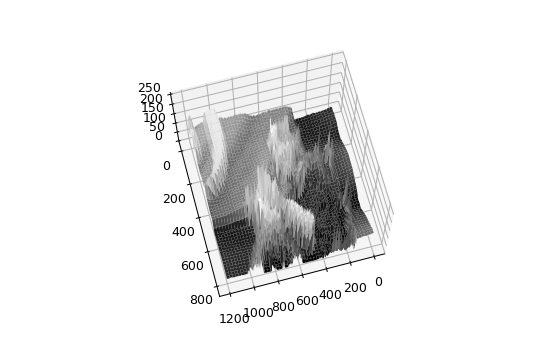

In [27]:
image_as_function(gray_steve) #change alpha and beta to view from different angles, or rotate the plot with your mouse

The lighter parts of the image are higher parts of the function, and the darker parts of the image are lower parts of the function. Let's look at the projections of a few more images to really hammer home the point.

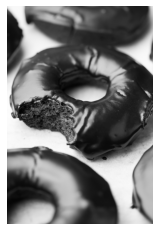

<IPython.core.display.Javascript object>


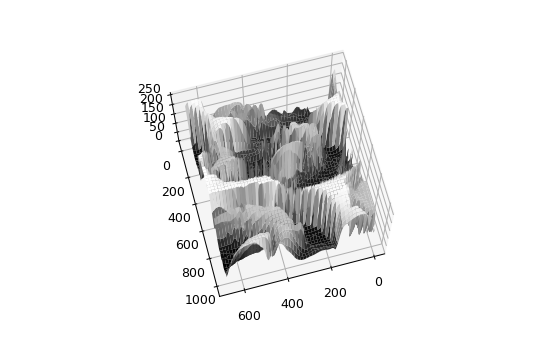

In [28]:
donuts = cv.imread('img/donuts.jpg', cv.IMREAD_GRAYSCALE)
show(donuts)
image_as_function(donuts)

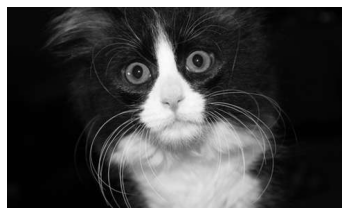

<IPython.core.display.Javascript object>


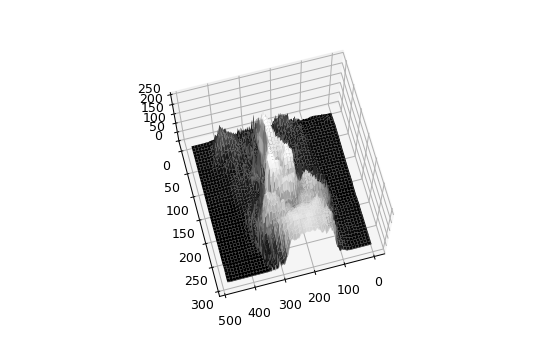

In [29]:
cat = cv.imread('img/cat.jpg', cv.IMREAD_GRAYSCALE)
show(cat)
image_as_function(cat)

Okay, cool, so we can plot images in three dimensions. Why should we care? The reason is that the mathematics of image processing makes so much more sense (visually and geometrically) when we envision the images as functions. As an example, we'll soon look at **edge detection**, where we want to identify edges between objects and their environment. One straightforward way to do that is to look for steep slopes on the graph of the image. We don't actually have to graph the images, but mathematically it's what we'll be computing beneath the hood. (You haven't forgotten about derivatives and gradient vectors, have you?!)

**Summary**
1. Images are functions whose independent variables are x and y position, and whose dependent variable is light intensity.
2. This perspective helps us to understand much of the mathematical analysis we will soon perform on images.

**Exercises**
1. Use the `image_as_function` function to create a `red_channel_as_function` function that plots the red intensity of a color photo as a 3-dimensional function. (You do not need to display in red, since the `image_as_function` function displays using the 'gray' cmap.
2. Use NumPy's [gradient](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) function to graph the location of any edges found along an image's horizontal axis. Define the function `basic_edge_detector`, which takes a grayscale image and plots any point where the absolute gradient is more than a threshold value, which should be an argument to the function.

***Exercise 1:*** Our approach here is to first extract the red channel (which we can do with our `split` function) and then send it to the `image_as_function` function. This should be rather straightforward:

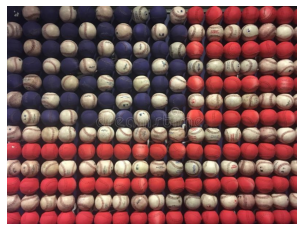

<IPython.core.display.Javascript object>


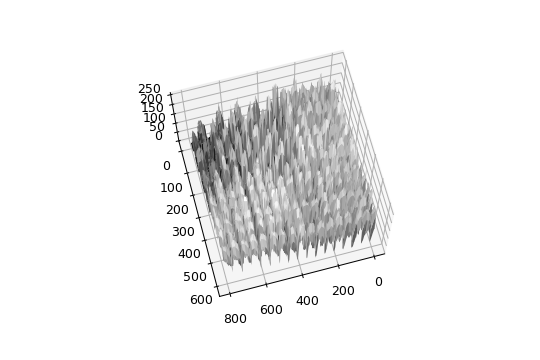

In [30]:
def red_channel_as_function(image):
    """
    Plots the red channel of an image as a 3-D function.
    """
    if len(image.shape) < 3:
        raise TypeError('Image should have 3 color channels')
    red, _, _ = split(image)
    red = red[:, :, 2]
    image_as_function(red)

flag = cv.imread('img/flag.jpg')
show(flag)
red_channel_as_function(flag)

***Exercise 2:*** This really just depends on your ability to read the documentation for the `gradient` function. Notice that there is no difference, at least at the level of the data structure, between functions and images. Our gradient, then, is just an image that we can plot.

In [31]:
def basic_edge_detector(image, threshold=15):
    """
    Plots edges along the horizontal of an image.
    An edge is any location where the gradient exceeds the threshold.
    """
    if len(image.shape) > 2:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    delta = np.gradient(image, axis = 1)
    delta = ((np.abs(delta) >= threshold)*255).astype(np.uint8)
    show(delta)

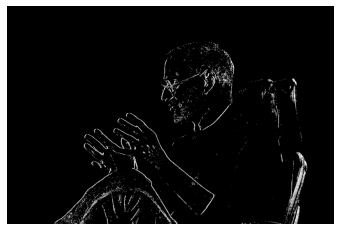

In [32]:
basic_edge_detector(steve, 15)

We can do a slightly better job if we consider vertical gradients as well:

In [33]:
def better_edge_detector(image, threshold=15):
    """
    Plots edges along the horizontal and vertical axes of an image.
    An edge is any location where the gradient exceeds the threshold.
    """
    if len(image.shape) > 2:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    delta_x = np.gradient(image, axis = 1)
    delta_y = np.gradient(image, axis = 0)
    x_mask = np.abs(delta_x) >= threshold
    y_mask = np.abs(delta_y) >= threshold
    mask = np.logical_or(x_mask, y_mask)
    delta = (mask*255).astype(np.uint8)
    show(delta)

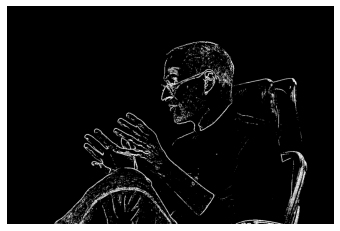

In [30]:
better_edge_detector(steve, 15)

## Conclusion
You've now seen the basics of image processing with OpenCV, a bit of NumPy, and some graphing with matplotlib. I will assume a basic proficiency with NumPy and, generally, linear algebra moving forward.

In the next notebook, we cover some more involved image manipulation examples and functions, image filtering, convolutions, and some ways to improve upon our rudimentary edge detection.